## U-NSGA-III


The algorithm is implemented based on <cite data-cite="unsga3"></cite>. NSGA-III selects parents randomly for mating. It has been shown that tournament selection performs better than random selection. The *U* stands for *unified* and increases the performance of NSGA-III by introducing tournament pressure. 

The mating selections works as follows:


<div style="display: block;margin-left: auto;margin-right: auto;width: 45%;">
![unsga3_mating](../resources/images/unsga3_mating.png)
</div>

### Example

In [1]:
from pymoo.optimize import minimize
from pymoo.util import plotting
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymop.factory import get_problem
from pymoo.factory import get_algorithm
import numpy as np

# create the reference directions to be used for the optimization
ref_dirs = UniformReferenceDirectionFactory(1, n_points=1).do()

# create the algorithm object
method = get_algorithm("unsga3",
                      pop_size=100,
                      ref_dirs=ref_dirs)

# execute the optimization
res = minimize(get_problem("ackley", n_var=30),
               method,
               termination=('n_gen', 150),
               save_history=True)

print("UNSGA3: Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

UNSGA3: Best solution found: 
X = [-0.10710611  0.06957438  0.03322685  0.08101078 -0.04074635 -0.09092184
  0.07400755 -0.00131644 -0.00981249  0.0199096   0.03462076 -0.08601353
 -0.06173738 -0.02719261  0.00931983 -0.04774055  0.01517344  0.04707081
  0.05529107  0.02296837 -0.09985841 -0.03708921 -0.04117093 -0.02707558
  0.03058929 -0.10858969  0.14062906 -0.01393336  0.00501679  0.08995541]
F = [0.44111199]


U-NSGA-III has for single- and bi-objective problems a tournament pressure which is known to be useful.
In the following we provide a quick comparison (here just one run, so not a valid experiment), to see the difference in convergence.

In [2]:
_res = minimize(get_problem("ackley", n_var=30),
                get_algorithm("nsga3", pop_size=100, ref_dirs=ref_dirs),
               termination=('n_gen', 150),
               save_history=True)
print("NSGA3: Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

NSGA3: Best solution found: 
X = [-0.10710611  0.06957438  0.03322685  0.08101078 -0.04074635 -0.09092184
  0.07400755 -0.00131644 -0.00981249  0.0199096   0.03462076 -0.08601353
 -0.06173738 -0.02719261  0.00931983 -0.04774055  0.01517344  0.04707081
  0.05529107  0.02296837 -0.09985841 -0.03708921 -0.04117093 -0.02707558
  0.03058929 -0.10858969  0.14062906 -0.01393336  0.00501679  0.08995541]
F = [0.44111199]


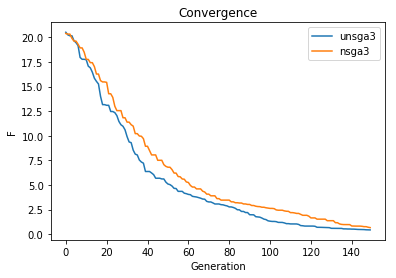

In [3]:
import numpy as np
import matplotlib.pyplot as plt

ret = [np.min(e.pop.get("F")) for e in res.history]
_ret = [np.min(e.pop.get("F")) for e in _res.history]

plt.plot(np.arange(len(ret)), ret, label="unsga3")
plt.plot(np.arange(len(_ret)), _ret, label="nsga3")
plt.title("Convergence")
plt.xlabel("Generation")
plt.ylabel("F")
plt.legend()
plt.show()